<a href="https://colab.research.google.com/github/Sagar-0507/Stock-Prediction-by-LSTM-Model/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import time
import datetime

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 110 kB 9.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 128 kB 58.5 MB/s 
     |████████████████████████████████| 112 kB 62.4 MB/s 
     |████████████████████████████████| 4.0 MB 48.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from yfinance.utils import auto_adjust
import yfinance as yf
hist = yf.Ticker('DJI')
df= hist.history(start="2008-08-08", end="2016-07-16", auto_adjust="True")


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-08-08 00:00:00-04:00,11734.299805,11734.299805,11734.299805,11734.299805,0,0.0,0.0
2008-08-11 00:00:00-04:00,11782.299805,11782.299805,11782.299805,11782.299805,0,0.0,0.0
2008-08-12 00:00:00-04:00,11642.500000,11642.500000,11642.500000,11642.500000,0,0.0,0.0
2008-08-13 00:00:00-04:00,11533.000000,11533.000000,11533.000000,11533.000000,0,0.0,0.0
2008-08-14 00:00:00-04:00,11615.900391,11615.900391,11615.900391,11615.900391,0,0.0,0.0
...,...,...,...,...,...,...,...
2016-07-11 00:00:00-04:00,18226.900391,18226.900391,18226.900391,18226.900391,58309451,0.0,0.0
2016-07-12 00:00:00-04:00,18347.699219,18347.699219,18347.699219,18347.699219,67057652,0.0,0.0
2016-07-13 00:00:00-04:00,18372.099609,18372.099609,18372.099609,18372.099609,56702227,0.0,0.0


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2008-08-08 00:00:00-04:00,11734.299805,11734.299805,11734.299805,11734.299805,0,0.0,0.0
1,2008-08-11 00:00:00-04:00,11782.299805,11782.299805,11782.299805,11782.299805,0,0.0,0.0
2,2008-08-12 00:00:00-04:00,11642.500000,11642.500000,11642.500000,11642.500000,0,0.0,0.0
3,2008-08-13 00:00:00-04:00,11533.000000,11533.000000,11533.000000,11533.000000,0,0.0,0.0
4,2008-08-14 00:00:00-04:00,11615.900391,11615.900391,11615.900391,11615.900391,0,0.0,0.0


In [ ]:
df = df.drop(['Date','Dividends','Stock Splits'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,11734.299805,11734.299805,11734.299805,11734.299805,0
1,11782.299805,11782.299805,11782.299805,11782.299805,0
2,11642.500000,11642.500000,11642.500000,11642.500000,0
3,11533.000000,11533.000000,11533.000000,11533.000000,0
4,11615.900391,11615.900391,11615.900391,11615.900391,0


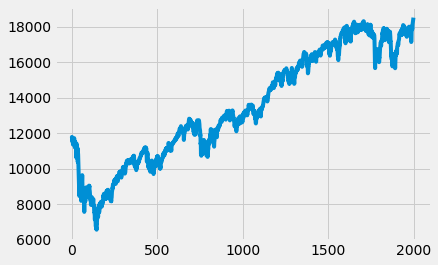

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,11734.299805,11734.299805,11734.299805,11734.299805,0
1,11782.299805,11782.299805,11782.299805,11782.299805,0
2,11642.500000,11642.500000,11642.500000,11642.500000,0
3,11533.000000,11533.000000,11533.000000,11533.000000,0
4,11615.900391,11615.900391,11615.900391,11615.900391,0
...,...,...,...,...,...
1993,18226.900391,18226.900391,18226.900391,18226.900391,58309451
1994,18347.699219,18347.699219,18347.699219,18347.699219,67057652
1995,18372.099609,18372.099609,18372.099609,18372.099609,56702227
1996,18506.400391,18506.400391,18506.400391,18506.400391,67012984


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1993    17576.998008
1994    17596.340996
1995    17616.141992
1996    17634.999004
1997    17655.846992
Name: Close, Length: 1998, dtype: float64

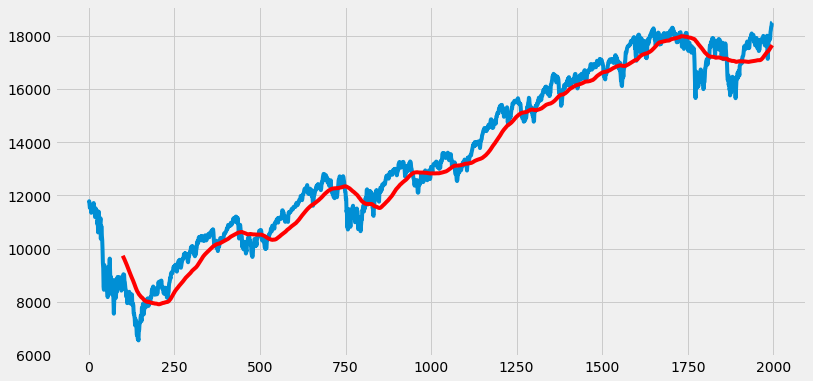

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1993    17302.906509
1994    17313.638506
1995    17323.925503
1996    17336.448003
1997    17348.785503
Name: Close, Length: 1998, dtype: float64

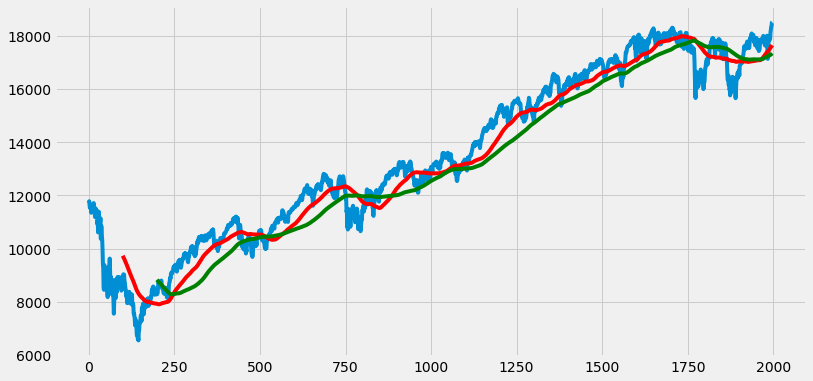

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(1998, 5)

In [ ]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1398, 1)
(600, 1)


In [ ]:
data_training.head()

,Close
0,11734.299805
1,11782.299805
2,11642.500000
3,11533.000000
4,11615.900391


In [ ]:
data_testing.head()

,Close
1398,16321.700195
1399,16168.000000
1400,16395.900391
1401,16360.200195
1402,16421.900391


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.51719156],
       [0.52197737],
       [0.50803871],
       ...,
       [0.96041746],
       [0.96228195],
       [0.96968997]])

In [ ]:
data_training_array.shape

(1398, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1298, 100, 1)

In [ ]:
# ML Model

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
41/41 [==============================] - 14s 217ms/step - loss: 0.0771
Epoch 2/50
41/41 [==============================] - 16s 392ms/step - loss: 0.0209
Epoch 3/50
41/41 [==============================] - 12s 280ms/step - loss: 0.0186
Epoch 4/50
41/41 [==============================] - 8s 198ms/step - loss: 0.0167
Epoch 5/50
41/41 [==============================] - 8s 200ms/step - loss: 0.0151
Epoch 6/50
41/41 [==============================] - 8s 195ms/step - loss: 0.0140
Epoch 7/50
41/41 [==============================] - 8s 198ms/step - loss: 0.0158
Epoch 8/50
41/41 [==============================] - 8s 200ms/step - loss: 0.0135
Epoch 9/50
41/41 [==============================] - 8s 199ms/step - loss: 0.0125
Epoch 10/50
41/41 [==============================] - 8s 197ms/step - loss: 0.0112
Epoch 11/50
41/41 [==============================] - 8s 197ms/step - loss: 0.0114
Epoch 12/50
41/41 [==============================] - 8s 196ms/step - loss: 0.0120
Epoch 13/50
41/41 [===

In [ ]:
data_testing.head()

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_training.tail(100)

,Close
1298,15072.599609
1299,14936.200195
1300,14776.500000
1301,14803.000000
1302,15126.099609
...,...
1393,16103.299805
1394,16207.099609
1395,16179.700195
1396,16198.400391


,Close
1298,15072.599609
1299,14936.200195
1300,14776.500000
1301,14803.000000
1302,15126.099609
...,...
1393,16103.299805
1394,16207.099609
1395,16179.700195
1396,16198.400391


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,15072.599609
1,14936.200195
2,14776.500000
3,14803.000000
4,15126.099609


,Close
0,15072.599609
1,14936.200195
2,14776.500000
3,14803.000000
4,15126.099609


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07916891],
       [0.04269945],
       [0.        ],
       [0.00708537],
       [0.09347334],
       [0.1231517 ],
       [0.14031707],
       [0.10467636],
       [0.15970158],
       [0.1591402 ],
       [0.16662663],
       [0.16462134],
       [0.18480796],
       [0.17026279],
       [0.19590393],
       [0.21224028],
       [0.21186612],
       [0.24165127],
       [0.22520785],
       [0.20568966],
       [0.22432558],
       [0.23063546],
       [0.22504753],
       [0.25945843],
       [0.21857707],
       [0.26344213],
       [0.26913711],
       [0.2604744 ],
       [0.27943096],
       [0.29402965],
       [0.31689001],
       [0.32071338],
       [0.31830703],
       [0.30060691],
       [0.32980405],
       [0.34445601],
       [0.34651484],
       [0.34659499],
       [0.35314562],
       [0.35023142],
       [0.32948315],
       [0.3042966 ],
       [0.29766582],
       [0.27940432],
       [0.3325313 ],
       [0.33394833],
       [0.3199379 ],
       [0.285

array([[0.07916891],
       [0.04269945],
       [0.        ],
       [0.00708537],
       [0.09347334],
       [0.1231517 ],
       [0.14031707],
       [0.10467636],
       [0.15970158],
       [0.1591402 ],
       [0.16662663],
       [0.16462134],
       [0.18480796],
       [0.17026279],
       [0.19590393],
       [0.21224028],
       [0.21186612],
       [0.24165127],
       [0.22520785],
       [0.20568966],
       [0.22432558],
       [0.23063546],
       [0.22504753],
       [0.25945843],
       [0.21857707],
       [0.26344213],
       [0.26913711],
       [0.2604744 ],
       [0.27943096],
       [0.29402965],
       [0.31689001],
       [0.32071338],
       [0.31830703],
       [0.30060691],
       [0.32980405],
       [0.34445601],
       [0.34651484],
       [0.34659499],
       [0.35314562],
       [0.35023142],
       [0.32948315],
       [0.3042966 ],
       [0.29766582],
       [0.27940432],
       [0.3325313 ],
       [0.33394833],
       [0.3199379 ],
       [0.285

In [ ]:
input_data.shape

(700, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(600, 100, 1)
(600,)
(600, 100, 1)
(600,)


In [ ]:
# Making Predictions

y_predicted = model.predict(x_test)

19/19 [==============================] - 2s 55ms/step


In [ ]:
y_predicted.shape

(600, 1)

In [ ]:
y_test

array([1545.21497907, 1391.51331322, 1619.41588429, 1583.71534742,
       1645.41613305, 1676.21525584, 1642.21493055, 1574.71526131,
       1563.61456917, 1332.41313841, 1289.21252978, 1470.71426629,
       1559.7151178 , 1445.7140271 , 1554.51487273, 1526.31440761,
       1500.21454853, 1591.4156164 , 1492.51427954, 1487.71442893,
       1546.61440652, 1681.21530368, 1756.11641092, 1796.51718807,
       1796.11679362, 1636.21487314, 1469.41444916, 1479.61376549,
       1660.71510754, 1393.71352959, 1250.31176697, 1396.71355829,
       1486.11382768, 1648.31655142, 1632.01561421, 1672.71522235,
       1737.91701804, 1725.21572465, 1725.21572465, 1585.01516454,
       1672.21521757, 1758.91721896, 1804.31804396, 1782.4174438 ,
       1736.41700369, 1754.11639178, 1624.51554246, 1742.01666664,
       1774.51697759, 1806.81806788, 1919.0183601 , 1938.91894112,
       1837.51758034, 1670.31676191, 1714.81718766, 1735.41699413,
       1597.81509169, 1756.6164157 , 1766.61651137, 1829.81828

In [ ]:
y_predicted

array([[1336.3588],
       [1361.0594],
       [1383.7268],
       [1404.7378],
       [1424.3069],
       [1442.5933],
       [1459.6598],
       [1475.503 ],
       [1489.9202],
       [1502.7264],
       [1513.4989],
       [1521.5708],
       [1526.6653],
       [1529.2428],
       [1529.85  ],
       [1529.317 ],
       [1528.3531],
       [1527.3694],
       [1526.7998],
       [1526.691 ],
       [1526.929 ],
       [1527.523 ],
       [1528.8734],
       [1531.6495],
       [1536.3661],
       [1543.9825],
       [1553.9827],
       [1564.5603],
       [1573.9551],
       [1581.5406],
       [1586.4175],
       [1587.9503],
       [1585.9043],
       [1580.6267],
       [1573.4386],
       [1566.2734],
       [1560.4044],
       [1556.7942],
       [1556.1566],
       [1558.8768],
       [1564.2054],
       [1571.2003],
       [1579.4615],
       [1589.2805],
       [1600.6136],
       [1613.1744],
       [1626.1384],
       [1638.0145],
       [1648.2844],
       [1656.9142],


In [ ]:
scaler.scale_

array([0.00026737])

In [ ]:
scale_factor = 1/0.00026737
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

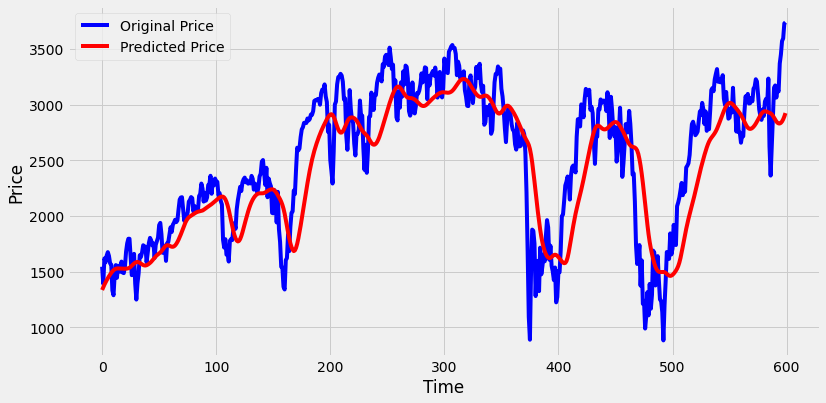

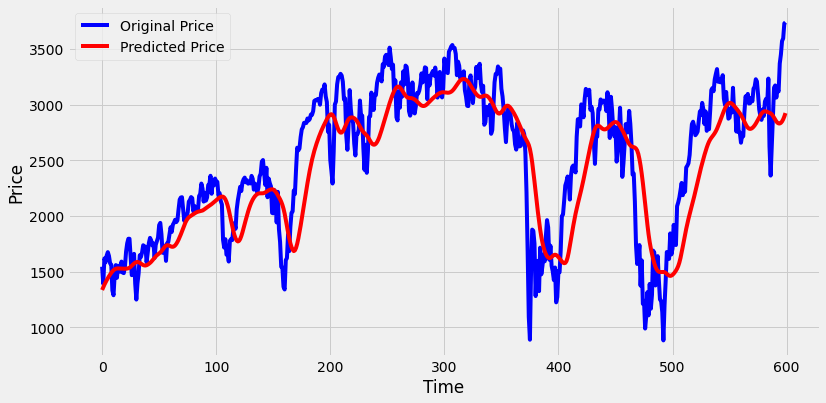

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

NameError: ignored